In [ ]:
# pip install tensorflow prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("reliance_finance_stock_data_2015_2023.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812195,1481821
1,2015-01-02,406.009430,409.643921,404.272217,404.843658,381.798981,3665683
2,2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616882,5051970
3,2015-01-06,397.734741,399.106232,380.362396,382.236786,360.478912,9313990
4,2015-01-07,382.693970,392.614471,382.648254,390.557220,368.325775,10360156
...,...,...,...,...,...,...,...
2216,2023-12-22,2559.600098,2580.899902,2547.649902,2565.050049,2565.050049,8270892
2217,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,2578.050049,3732832
2218,2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,2586.850098,4602078
2219,2023-12-28,2589.800049,2612.000000,2586.850098,2605.550049,2605.550049,6151318


## EDA

In [ ]:
data.shape

(2221, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2221 non-null   object 
 1   Open       2221 non-null   float64
 2   High       2221 non-null   float64
 3   Low        2221 non-null   float64
 4   Close      2221 non-null   float64
 5   Adj Close  2221 non-null   float64
 6   Volume     2221 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 121.6+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2221 non-null   datetime64[ns]
 1   Open       2221 non-null   float64       
 2   High       2221 non-null   float64       
 3   Low        2221 non-null   float64       
 4   Close      2221 non-null   float64       
 5   Adj Close  2221 non-null   float64       
 6   Volume     2221 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 121.6 KB


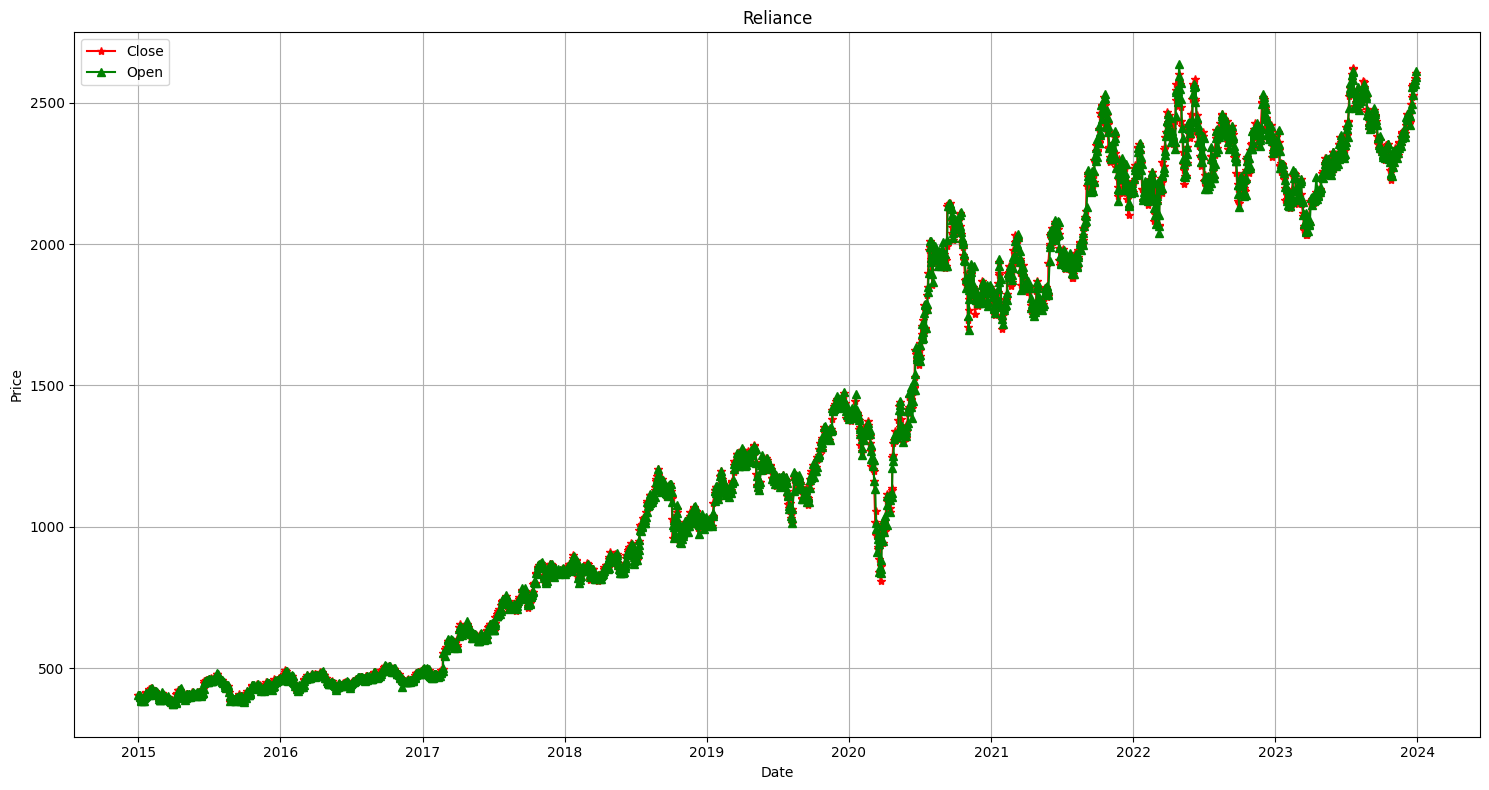

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Close'], c="r", label="Close", marker="*")
plt.plot(data['Date'], data['Open'], c="g", label="Open", marker="^")
plt.title('Reliance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


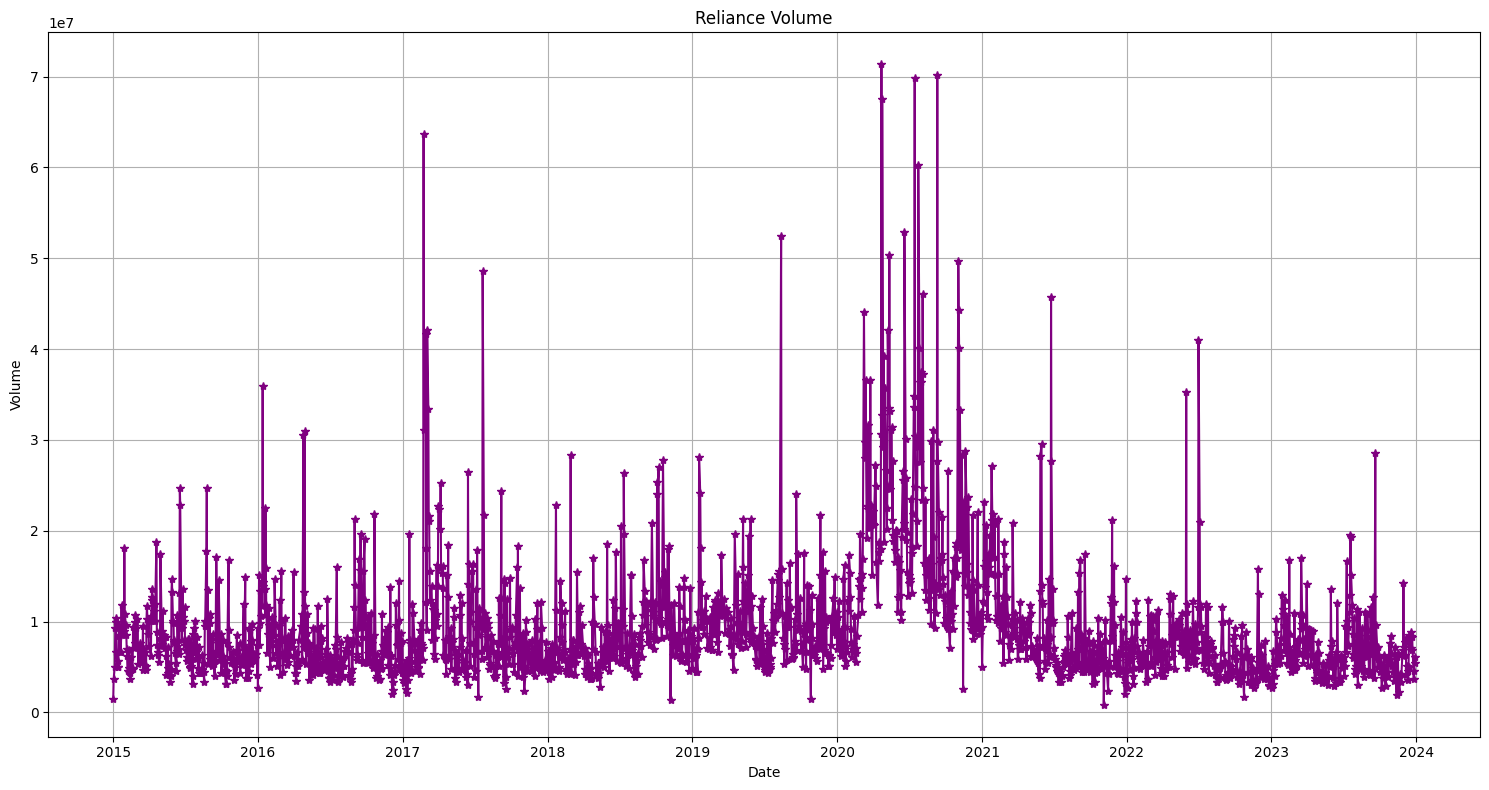

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Volume'], c='purple', marker='*')
plt.title("Reliance Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

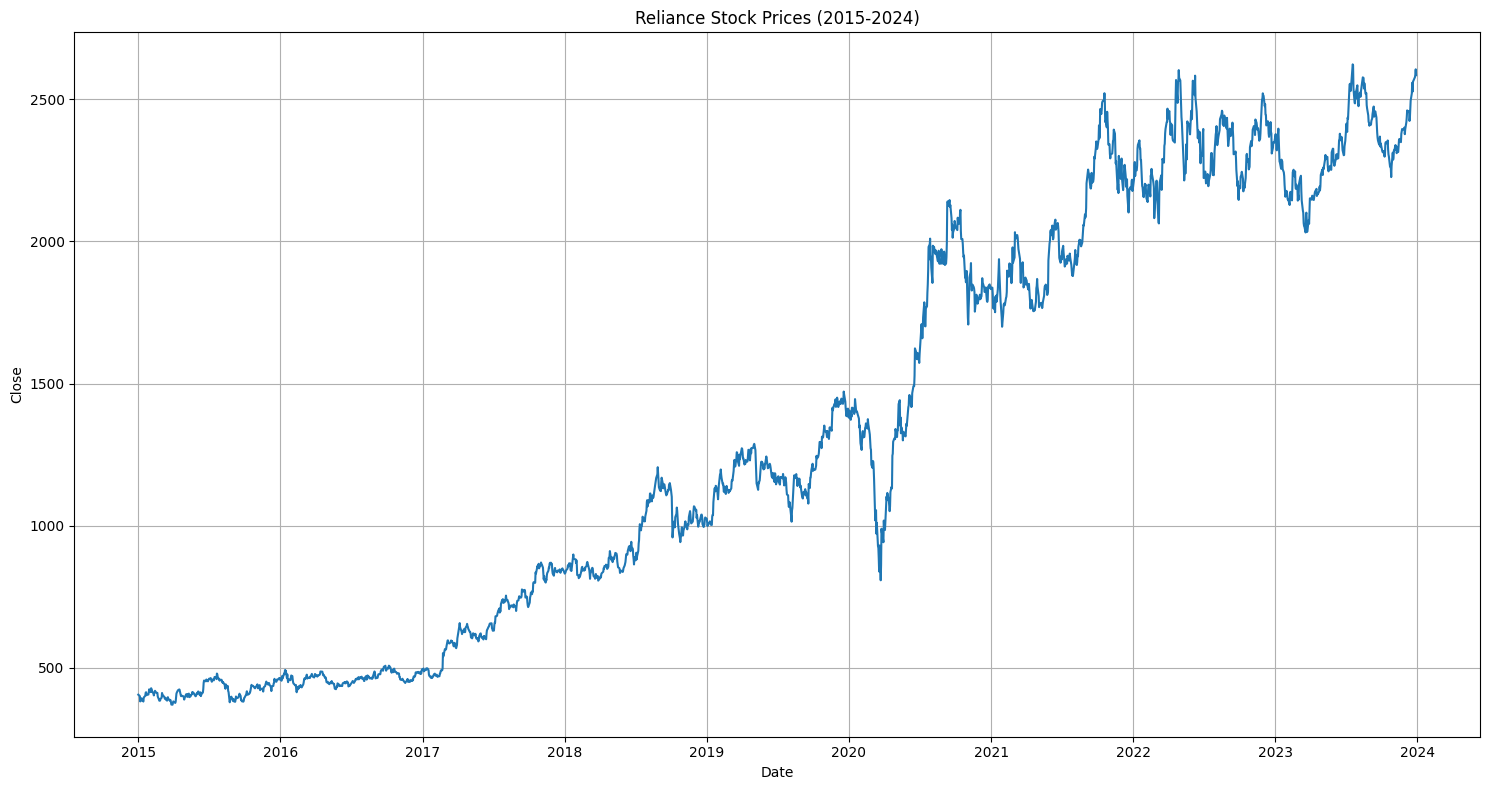

In [ ]:
reliance = data
prediction_range = reliance.loc[(reliance['Date'] > datetime(2014, 1, 1)) & (reliance['Date'] < datetime(2024, 1, 1))]
plt.figure(figsize=(15, 8))
plt.plot(prediction_range['Date'], prediction_range['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Reliance Stock Prices (2015-2024)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
close_data = reliance.filter(['Close'])
dataset = close_data.values
training_size = int(np.ceil(len(dataset) * .90))
print(training_size)

1999


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_size), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


## Model Building

In [ ]:
# Building LSTM model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0746
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0103
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0098
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0088
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0075
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0070
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0084
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0060
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0066
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0061


In [ ]:
model.save('lstm_model.h5')

In [ ]:
test_data = scaled_data[training_size - 60:, :]
x_test = []
y_test = dataset[training_size:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
MSE 3345.127191961751
RMSE 57.83707454532733


In [ ]:
dataset[training_size:, :]

array([[2149.66625977],
       [2133.4675293 ],
       [2128.3449707 ],
       [2170.84912109],
       [2174.63330078],
       [2156.72729492],
       [2144.45141602],
       [2194.9855957 ],
       [2244.68896484],
       [2242.93530273],
       [2252.30371094],
       [2228.49047852],
       [2246.67358398],
       [2195.72387695],
       [2185.20166016],
       [2200.15429688],
       [2185.5246582 ],
       [2143.71289062],
       [2163.41894531],
       [2146.94335938],
       [2201.72338867],
       [2223.22924805],
       [2231.21337891],
       [2177.58691406],
       [2143.85131836],
       [2108.59277344],
       [2100.70117188],
       [2064.79638672],
       [2054.50488281],
       [2051.9206543 ],
       [2031.75305176],
       [2094.93237305],
       [2101.30102539],
       [2074.71875   ],
       [2033.6451416 ],
       [2065.2578125 ],
       [2074.90332031],
       [2062.62744141],
       [2151.55834961],
       [2151.92749023],
       [2146.75878906],
       [2161.157

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MSE: 3345.127191961751
RMSE: 57.83707454532733


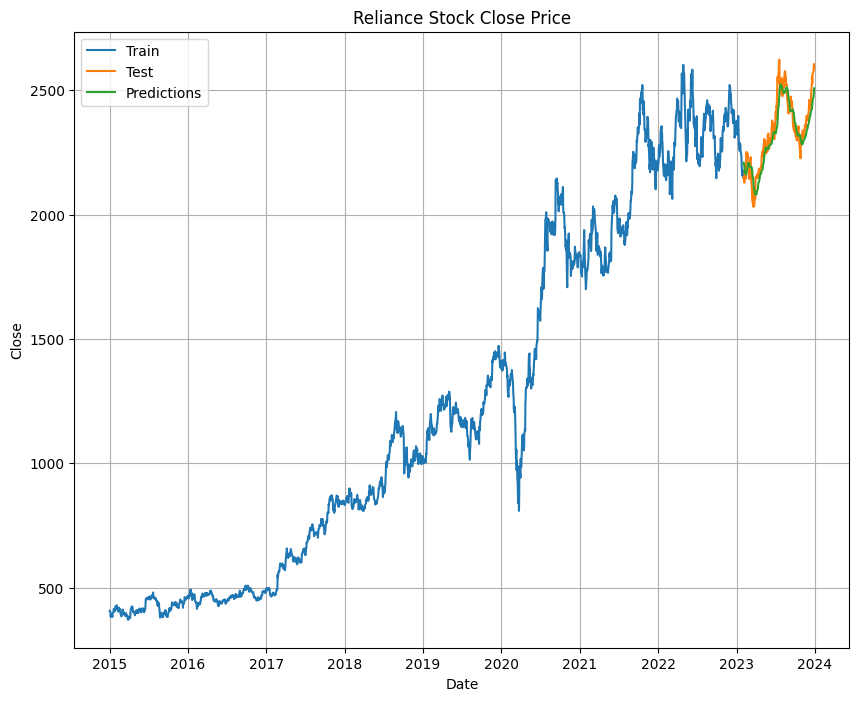

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

# Prepare train and test datasets for plotting
train = reliance[:training_size]
test = reliance[training_size:]
test['Predictions'] = predictions

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(test['Date'], test['Predictions'], label='Predictions')
plt.title('Reliance Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# arima model
arima_model = ARIMA(train_data['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test_data))
arima_predictions = arima_predictions[:len(test_data_close)]  # Ensure the lengths match

# Calculate MSE and RMSE for ARIMA
arima_mse = mean_squared_error(test_data_close, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

print(arima_mse)
print(arima_rmse)

51380.00205843697
226.67157311501805


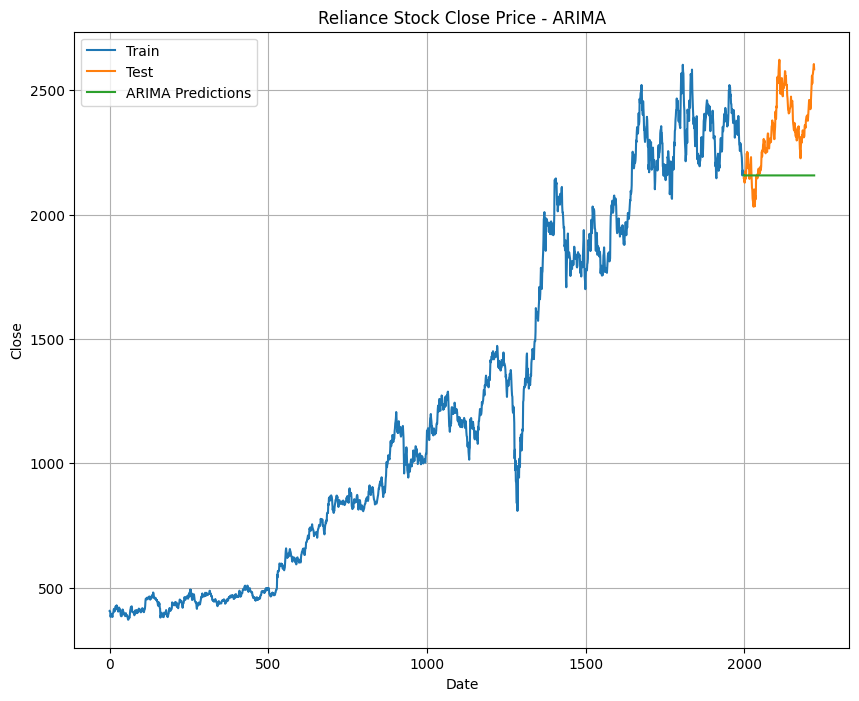

In [ ]:
# Plotting the results for ARIMA
plt.figure(figsize=(10, 8))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index[:len(arima_predictions)], arima_predictions, label='ARIMA Predictions')
plt.title('Reliance Stock Close Price - ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle

with open('arima_model.pkl', 'wb') as arima_file:
    pickle.dump(arima_model, arima_file)

with open('lstm_model.pkl', 'wb') as lstm_file:
    pickle.dump(model, lstm_file)


## Based on above visualisations of different models, LSTM model is chosen for deployment due to its closeness of the prediction values with test values